In [35]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

In [36]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
from sklearn import datasets

def load_digits():
    return datasets.load_digits()

digits = load_digits()

In [37]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)
print(digits.feature_names)
print(digits.target_names)
print(digits.target)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 ... 8 9 8]


In [38]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)

print(digits.data.shape)
print(digits.data[0])
print(digits.target[0:50])
print(digits.target.shape)
print(digits.target_names.shape)
print(len(digits.feature_names))

(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]
(1797,)
(10,)
64


In [39]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)
import sklearn

def predict(n_clusters:int, random_state:int, digits) -> (sklearn.cluster.KMeans, np.ndarray):
    kmeans = KMeans(n_clusters = n_clusters, random_state= random_state)
    preds = kmeans.fit_predict(digits.data)
    return (kmeans, preds)


In [40]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.
kmeans, preds = predict(10, 0, digits)
centroids = kmeans.cluster_centers_.shape
print(preds.shape)
print(centroids)
print(preds[0:10])

(1797,)
(10, 64)
[5 7 7 1 0 3 9 4 3 3]


c:\Users\Bihari Levente\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(1797,) (1797,)
(10,) (10,)


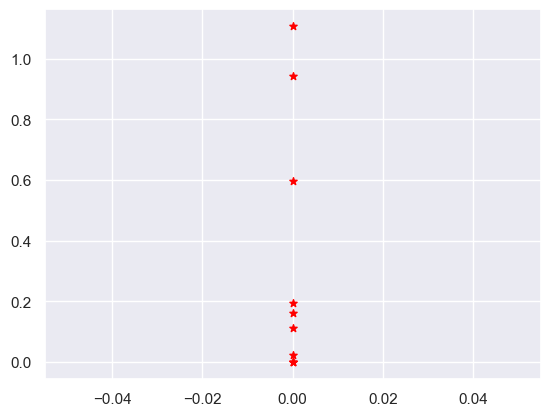

In [41]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
print(digits.data[:, 0].shape, digits.data[:, 1].shape)
print(kmeans.cluster_centers_[:, 0].shape, kmeans.cluster_centers_[:, 1].shape)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=30, color='red')
plt.show()

In [60]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray

"""
def get_labels(clusters:np.ndarray, digits):
    result = np.zeros_like(clusters)
    for i in range(10):
        mask = clusters == i
        sub = digits.target[mask]
        mode = np.bincount(sub).argmax()
        result[mask] = mode
    return result


"""
def get_labels(clusters:np.ndarray, digits) -> np.ndarray:
    result_array = np.zeros_like(clusters)
    #result_array = np.array([None] * len(clusters))
    for i in range(digits.target_names.shape[0]):
        mask = clusters == i
        sub_array = digits.target[mask]
        mode_element = mode(sub_array)
        result_array[mask] = mode_element[0]

    return result_array

print(len(get_labels(preds, digits)), get_labels(preds, digits)[0:20])
print(np.any(get_labels(preds, digits) == None))


1797 [0 8 8 3 4 9 6 7 9 9 0 1 2 3 4 5 6 7 8 9]
False


C:\Users\Bihari Levente\AppData\Local\Temp\ipykernel_27372\3756927855.py:34: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_element = mode(sub_array)


In [62]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t

def calc_accuracy(target_labels:np.ndarray, predicted_labels:np.ndarray):
    return np.round(accuracy_score(target_labels, predicted_labels),2)

print(get_labels(preds, digits).shape, get_labels(preds, digits)[0:50])
print(digits.target.shape, digits.target[0:50])
calc_accuracy(digits.target, get_labels(preds, digits))

(1797,) [0 8 8 3 4 9 6 7 9 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 1 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]
(1797,) [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0]


C:\Users\Bihari Levente\AppData\Local\Temp\ipykernel_27372\3756927855.py:34: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_element = mode(sub_array)


0.79

C:\Users\Bihari Levente\AppData\Local\Temp\ipykernel_27372\3756927855.py:34: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_element = mode(sub_array)


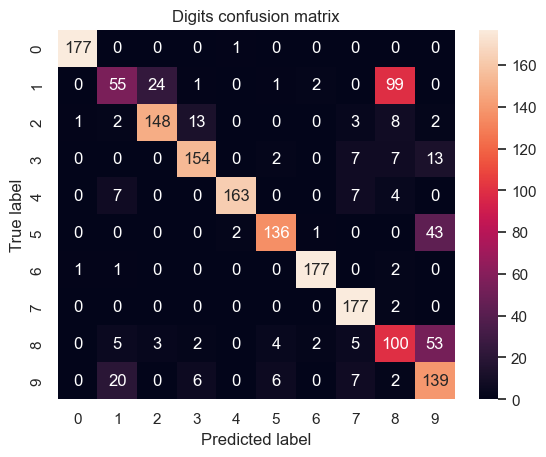

In [82]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével

conf_matrix = confusion_matrix(digits.target, get_labels(preds, digits))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Digits confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()